自定义函数g实现表达式的运算功能和表现能力

In [ ]:
def g(f, a, b=None):
    """
    f: 一元或二元运算函数
    a: 第一个参数
    b: 如果f是一元运算函数，则b为空，否则代表二元运算的第二个参数
    """
    if b is None:
        return f(a)
    else:
        return f(a,b)

针对常见的一元运算（对数、平方根、平方、立方、倒数、sigmoid、tanh、relu、binary）、二元运算(加、减、乘、除)可重新定义函数

In [2]:
import numpy as np

min_number = 0.01

# 一元运算
def log(x):
    return np.sign(x)*np.log2(np.abs(x)+1)

def sqrt(x):
    return np.sqrt(x-np.min(x)+min_number)

def pow2(x):
    return x**2

def pow3(x):
    return x**3

def inv(x):
    return 1*np.sign(x)/(np.abs(x)+min_number)

def sigmoid(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return (1 + np.exp(-x))**(-1)

def tanh(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return np.array([e if e > 0 else 0 for e in x])

def binary(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return np.array([1 if e > 0 else 0 for e in x])

# 二元运算
def add(x,y):
    return x + y

def sub(x,y):
    return x - y

def times(x,y):
    return x * y

def div(x,y):
    return x*np.sign(y)/(np.abs(y)+min_number)

表达式的计算

In [3]:
g(times,g(add,g(np.sin,5),10),g(log,46))

50.219458431129446

定义函数gen_full_tree_exp

In [4]:
import random

# 定义二元运算函数的集合
two_group = ['add', 'sub', 'times', 'div']

# 定义一元运算函数的集合
one_group = ['log', 'sqrt', 'pow2', 'pow3', 'inv', 'sigmoid', 'tanh', 'relu', 'binary']

# 随机增加一元运算符
def add_one_group(feature_string, prob=0.3):
    return 'g('+random.choice(one_group)+','+feature_string+')' if np.random.uniform(0, 1) < prob else feature_string

# 构建满二叉树，并生成数学表达式
def gen_full_tree_exp(var_flag_array):
    half_n = len(var_flag_array)//2
    middle_array = []
    for i in range(half_n):
        if var_flag_array[i] == '0' and var_flag_array[i+half_n] != '0':
            middle_array.append('g('+random.choice(one_group)+','+add_one_group(var_flag_array[i+half_n])+')')
        elif var_flag_array[i] != '0' and var_flag_array[i+half_n] == '0':
            middle_array.append('g('+random.choice(one_group)+','+add_one_group(var_flag_array[i])+')')
        elif var_flag_array[i] != '0' and var_flag_array[i+half_n] != '0':
            middle_array.append('g('+random.choice(two_group)+','+add_one_group(var_flag_array[i])+','+add_one_group(var_flag_array[i+half_n])+')')
    if len(middle_array) == 1:
        return add_one_group(middle_array[0])
    else:
        return gen_full_tree_exp(middle_array)

假设原始属性的下标为1~8，nMax=10，'0'为虚拟特征，则从原始属性中随机选取N个属性

In [5]:
# 随机抽取 N 个特征下标
nMax=10
N = random.choice(range(2,nMax+1))

# 定义原始数据集中属性的下标1-8
featureIdx = range(1,9)
select_feature_index = [random.choice(featureIdx) for i in range(N)]+[0]*int(2**np.ceil(np.log2(N)) - N)
random.shuffle(select_feature_index)
select_feature_index = ['X'+str(e) if e> 0 else '0' for e in select_feature_index]
select_feature_index

['0',
 'X8',
 'X6',
 '0',
 'X8',
 '0',
 '0',
 'X6',
 'X4',
 'X1',
 '0',
 'X5',
 '0',
 'X1',
 'X4',
 'X8']

按满二叉树方式生成特征表达式

In [6]:
tree_exp = gen_full_tree_exp(select_feature_index)
tree_exp

'g(tanh,g(times,g(times,g(add,g(sqrt,X4),g(pow3,X8)),g(div,g(inv,g(sqrt,X6)),g(binary,X4))),g(binary,g(add,g(pow2,g(times,g(sqrt,g(sub,X8,X1)),g(pow3,g(pow3,X1)))),g(div,g(inv,X5),g(pow2,g(times,X6,X8)))))))'

定义函数gen_side_tree_exp

In [7]:
#构建偏二叉树，并生成数学表达式
def gen_side_tree_exp(var_flag_array):
    if len(var_flag_array) == 1:
        return add_one_group(var_flag_array[0])
    else:
        var_flag_array[1] = 'g('+random.choice(two_group)+','+add_one_group(var_flag_array[0])+','+add_one_group(var_flag_array[1])+')'
        del var_flag_array[0]
        return gen_side_tree_exp(var_flag_array)

从原始属性中随机选取N个属性

In [8]:
N = random.choice(range(2,nMax+1))
select_feature_index = ['X'+str(e) for e in [random.choice(featureIdx) for i in range(N)]]
select_feature_index

['X6', 'X6', 'X2']

按偏二叉树方式生成特征表达式

In [9]:
tree_exp = gen_side_tree_exp(select_feature_index)
tree_exp

'g(div,g(times,g(sqrt,X6),X6),g(log,X2))'

编写Python函数random_get_tree，实现特征表达式的随机生成

In [10]:
def random_get_tree(input_data,featureIdx,nMax=10):
    """ 
    从原始数据特征中，随机获取特征表达树  
    featureIdx: 原始特征的下标数值，最小从1开始
    nMax:一次最多从特征中可放回抽样次数，默认为10
    """
    data = pd.DataFrame({"X"+str(e):input_data.iloc[:,(e-1)].values for e in featureIdx})
    
    # 随机抽取N个特征下标
    N = random.choice(range(2,nMax+1))
    
    # 随机决定是使用满二叉树还是偏二叉树
    if random.choice([0,1]) == 1:
        # 选择满二叉树
        select_feature_index = [random.choice(featureIdx) for i in range(N)]+[0]*int(2**np.ceil(np.log2(N)) - N)
        random.shuffle(select_feature_index)
        select_feature_index = ['data.X'+str(e)+".values" if e> 0 else '0' for e in select_feature_index]
        tree_exp = gen_full_tree_exp(select_feature_index)
    else:
        # 选择偏二叉树
        select_feature_index = ['data.X'+str(e)+".values" for e in [random.choice(featureIdx) for i in range(N)]]
        tree_exp =  gen_side_tree_exp(select_feature_index)
    return {"f_value":eval(tree_exp),"tree_exp":tree_exp.replace("data.","").replace(".values","")}

以iris数据集为例，其特征下标为1:4，则使用random_get_tree函数随机生成一个特征表达式

In [11]:
import pandas as pd
iris = pd.read_csv("http://image.cador.cn/data/iris.csv")
out = random_get_tree(iris,[1,2,3,4])
out['tree_exp']

'g(log,g(sub,g(div,X1,g(relu,X2)),g(sub,g(tanh,X2),g(relu,X3))))'

In [12]:
out['f_value']

array([2.37484101, 0.1778776 , 3.86504948, 5.43992791, 2.04359372,
       1.49057503, 2.60901032, 2.72281499, 0.42988853, 5.52923905,
       1.89695809, 2.66703453, 0.1778776 , 0.1778776 , 1.42562205,
       0.88156743, 1.49057503, 2.37484101, 1.75622778, 1.59894514,
       2.82829504, 1.81674199, 1.92791555, 3.24218814, 2.66703453,
       0.1778776 , 2.72281499, 2.4016217 , 2.7765188 , 3.86504948,
       5.5000787 , 2.82829504, 1.12023908, 1.06582127, 5.52923905,
       3.95025425, 2.47910425, 2.01553206, 0.1778776 , 2.74991677,
       2.34755376, 0.95651372, 3.77449497, 2.34755376, 1.59894514,
       0.1778776 , 1.59894514, 3.83549172, 1.87071186, 3.2151217 ,
       4.4530588 , 4.32310939, 6.02927151, 1.05530763, 1.00731844,
       0.96593856, 3.59790023, 0.93168172, 0.86845021, 0.81325811,
       0.98894877, 0.46721677, 1.07015385, 0.91267903, 0.42988853,
       5.98138388, 0.63501342, 0.90369399, 1.25329007, 0.95455486,
       4.22569256, 0.73911078, 1.32559126, 1.04754447, 0.72699

定义二叉树节点类

In [13]:
class Node:
    def __init__(self, value, label, left=None, right=None):
        self.value = value
        self.label = label
        self.left = left  
        self.right = right

定义transform函数

In [14]:
import re

def transform(feature_string):
    my_dict={}
    pattern = r'g\([^\(\)]*\)'
    so = re.search(pattern, feature_string)
    while so:
        start, end = so.span()
        key = len(my_dict)
        my_dict[key]=so.group()
        feature_string = feature_string[0:start]+'<'+str(key)+'>'+feature_string[end:]
        so = re.search(pattern, feature_string)
    return my_dict

exp_tmp = 'g(add,g(div,g(sub,g(sqrt,X1),X1),g(times,g(binary,X2),X3)),g(div,g(sigmoid,X3),g(add,X4,X2)))'
transform(exp_tmp)

{0: 'g(sqrt,X1)',
 1: 'g(sub,<0>,X1)',
 2: 'g(binary,X2)',
 3: 'g(times,<2>,X3)',
 4: 'g(div,<1>,<3>)',
 5: 'g(sigmoid,X3)',
 6: 'g(add,X4,X2)',
 7: 'g(div,<5>,<6>)',
 8: 'g(add,<4>,<7>)'}

定义parse函数

In [15]:
def parse(group_unit):
    tmp = group_unit.lstrip("g(").rstrip(")").split(',')
    tmp = tmp + [None] if len(tmp) == 2 else tmp
    return [int(x[1:-1]) if x is not None and re.match(r'<[0-9]+>',x) else x for x in tmp]

编写bitree函数，通过深度优化遍历的方式构建二叉树

In [16]:
def bitree(mapping, start_no, index=0, labels={}):
    name, left, right = parse(mapping[start_no])
    if left is not None:
        if type(left) == int:
            left_node, s_labels, max_index = bitree(mapping, left, index+1, labels)
            labels = s_labels
        else:
            left_node = Node(index+1, left)
            labels[index+1] = left
            max_index = index+1
    else:
        left_node = None
    
    if right is not None:
        if type(right) == int:
            right_node, s_labels, max_index = bitree(mapping, right, max_index+1, labels)
            labels = s_labels
        else:
            right_node = Node(max_index+1, right)
            labels[max_index+1] = right
            max_index = max_index+1
    else:
        right_node = None
        
    labels[index] = name
    return Node(index, name, left_node, right_node) ,labels, max_index

定义create_graph函数

In [17]:
def create_graph(G, node, pos={}, x=0, y=0, layer=1):
    pos[node.value] = (x, y)
    if node.left:
        G.add_edge(node.value, node.left.value)
        l_x, l_y = x - 1 / layer, y - 1
        l_layer = layer + 1
        create_graph(G, node.left, x=l_x, y=l_y, pos=pos, layer=l_layer)
    if node.right:
        G.add_edge(node.value, node.right.value)
        r_x, r_y = x + 1 / layer, y - 1
        r_layer = layer + 1
        create_graph(G, node.right, x=r_x, y=r_y, pos=pos, layer=r_layer)
    return G, pos

编写Python代码，对特征表达式字符串exp_tmp，绘制对应的二叉树图

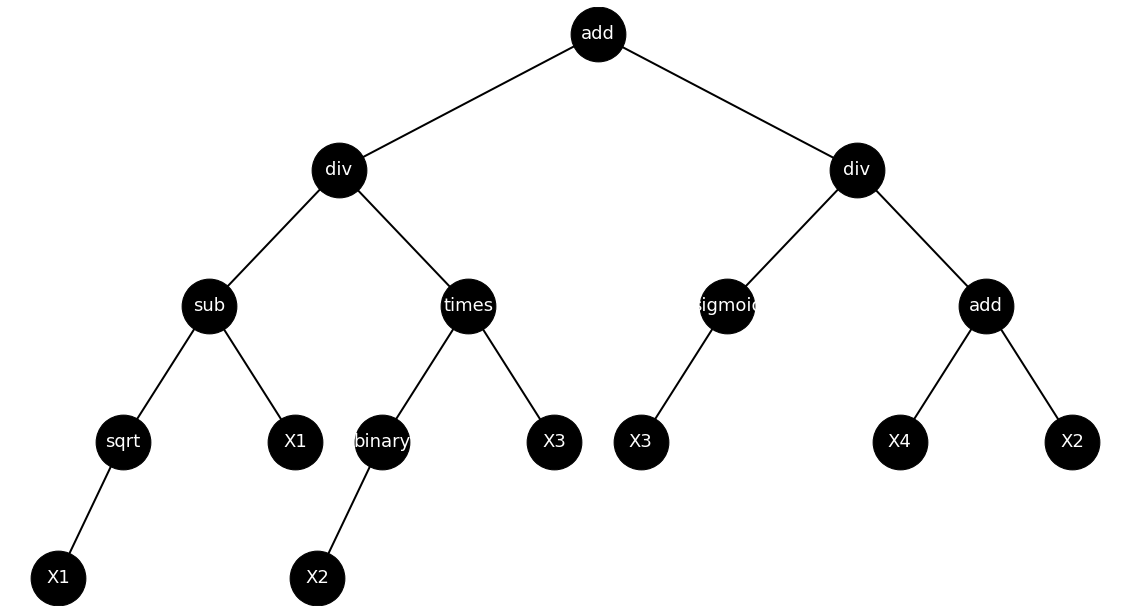

In [19]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'

def plot_tree(feature_string, title=None, node_size=3000, font_size=18):
    my_dict = transform(feature_string)
    root, labels, _ = bitree(my_dict, len(my_dict)-1, 0, labels={})
    graph = nx.Graph()
    graph, pos = create_graph(graph, root)
    nx.draw_networkx(graph, pos, node_size=node_size,width=2,node_color='black',font_color='white',font_size=font_size,with_labels=True,labels=labels)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    
plt.figure(figsize=(20,11))
plot_tree(exp_tmp)
plt.show()